In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df #failure -> 1 hatalı. 

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [5]:
df.failure.value_counts() 

0    124388
1       106
Name: failure, dtype: int64

<AxesSubplot:xlabel='failure', ylabel='count'>

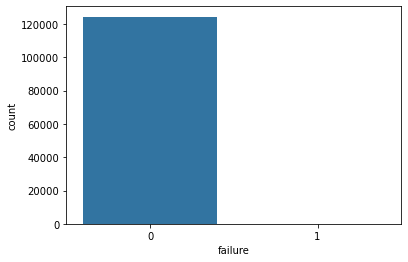

In [6]:
sns.countplot(data=df, x="failure") #Imbalanced data.

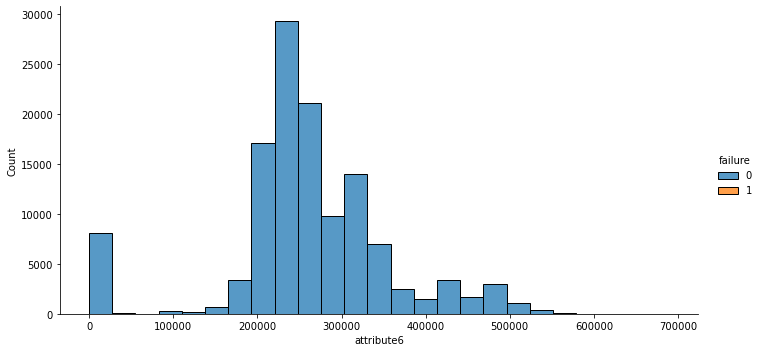

In [7]:
sns.displot(data=df, kind='hist', x ='attribute6', hue ='failure', multiple='stack',bins=25,aspect=2) 
#Veri oldukça dengesiz. Oversampling veya undersampling ile failure değerlerini yaklaştırıp incelemeliyiz.

In [8]:
df.corr()['failure'].sort_values(ascending=False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6   -0.000550
attribute3   -0.000948
Name: failure, dtype: float64

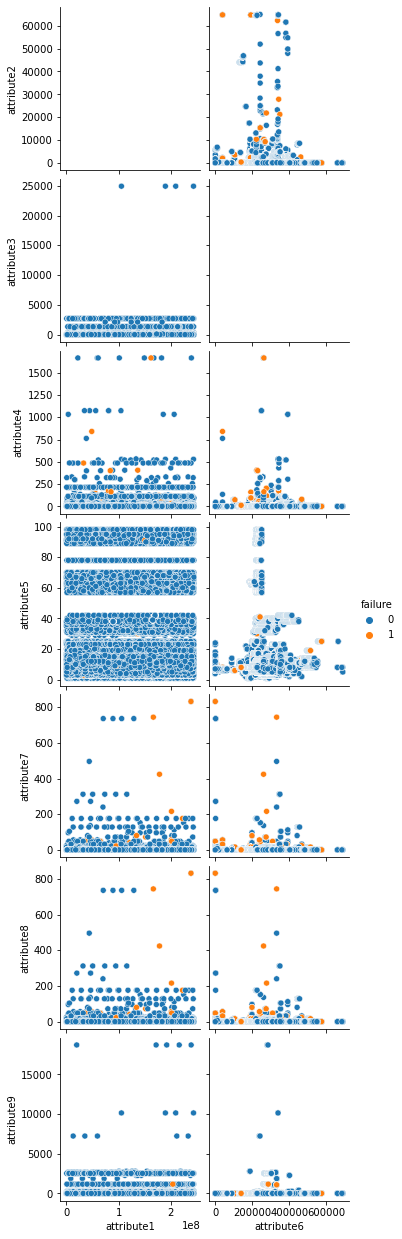

In [9]:
sns.pairplot(data=df,x_vars=["attribute1", "attribute6"],y_vars=["attribute2", "attribute3", "attribute4",
                                   "attribute5","attribute7", "attribute8", "attribute9"],hue="failure", aspect=1)
#attribute 7,8 ve 4,2 dikkatimi çekiyor. 

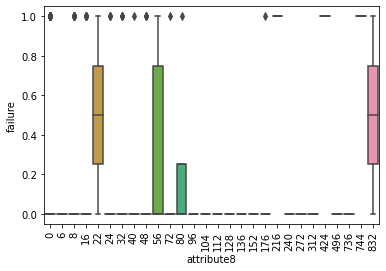

In [10]:
sns.boxplot("attribute8","failure",data=df)
plt.xticks(rotation=90); #üstteki grafikte attribute 7, 8 dikkatimi çekiyor.  

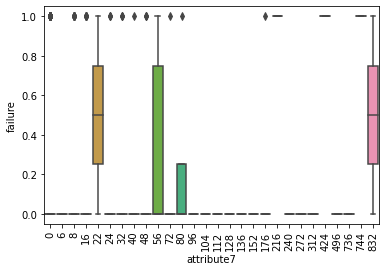

In [11]:
sns.boxplot("attribute7","failure",data=df)
plt.xticks(rotation=90); #attribute 8 ile neredeyse aynı özellikteler. 

In [7]:
df=df.drop('attribute8',axis=1) #aynı olduklarından birini siliyorum. 

In [13]:
#sns.pairplot(data=df,x_vars=["date", "device"],y_vars=["attribute1", "attribute6"],hue="failure", aspect=1)

In [14]:
print(df.shape)

a=['date','device']  
b=df.drop(a, axis = 1)
#b=["attribute1","attribute2","attribute3","attribute4","attribute5","attribute6","attribute7","attribute8","attribute9"]


(124494, 11)


In [15]:
print(b.shape)

# set up features and target
y=b['failure']
X=b.drop(['failure'], axis = 1)

(124494, 9)


In [16]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X, y)
y_pred = single_rf.predict(X)

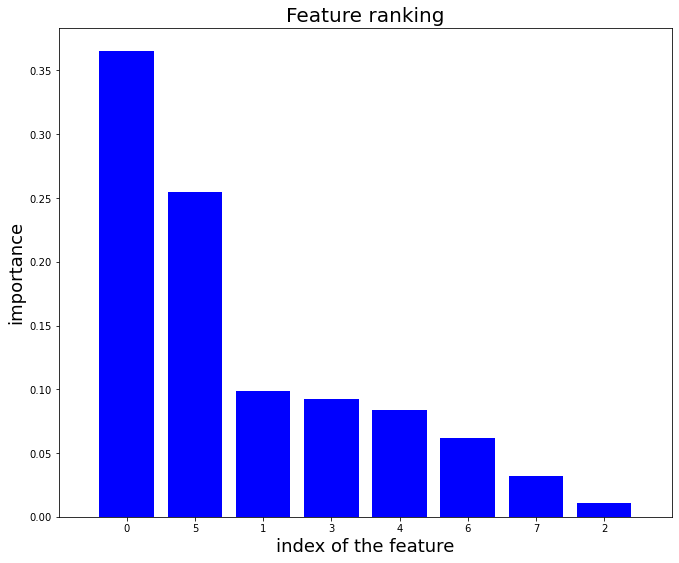

attribute1    0.365387
attribute6    0.254636
attribute2    0.098904
attribute4    0.092688
attribute5    0.083834
attribute7    0.061784
attribute9    0.031751
attribute3    0.011017
dtype: float64


In [17]:
#feature importance graph
importances = single_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns    
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), indices) #feature_names, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#feature importance list
important_features = pd.Series(data=single_rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features.head(10))

In [18]:
#attribute 7,9,3 çok etkilememiş.

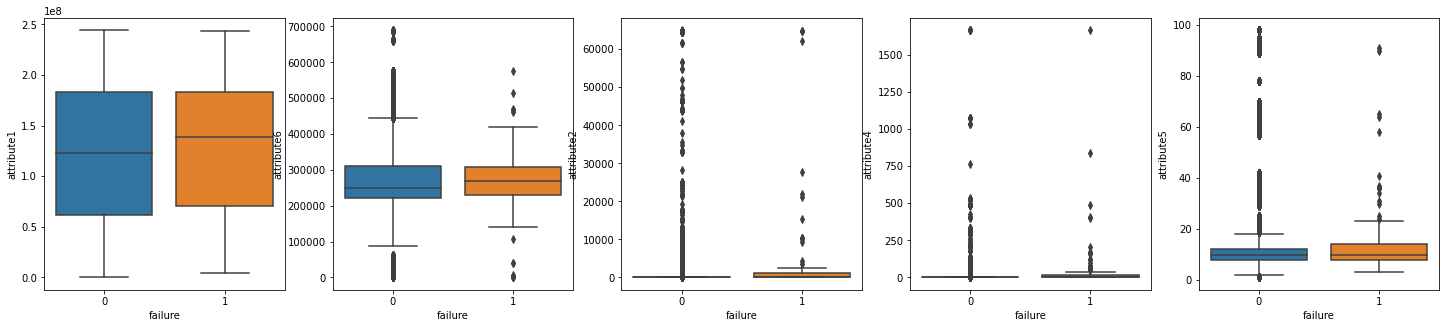

In [19]:
f, axes = plt.subplots(ncols=5, figsize=(25,5))

sns.boxplot(x="failure", y="attribute1", data=df, ax=axes[0])

sns.boxplot(x="failure", y="attribute6", data=df, ax=axes[1])

sns.boxplot(x="failure", y="attribute2", data=df, ax=axes[2])

sns.boxplot(x="failure", y="attribute4", data=df, ax=axes[3])

sns.boxplot(x="failure", y="attribute5", data=df, ax=axes[4])

plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.4+ MB


In [21]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3
...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0


In [8]:
import datetime as dt
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df=df.drop('date',axis=1)

In [9]:
df.year.value_counts()

2015    124494
Name: year, dtype: int64

In [10]:
df=df.drop('year',axis=1) 

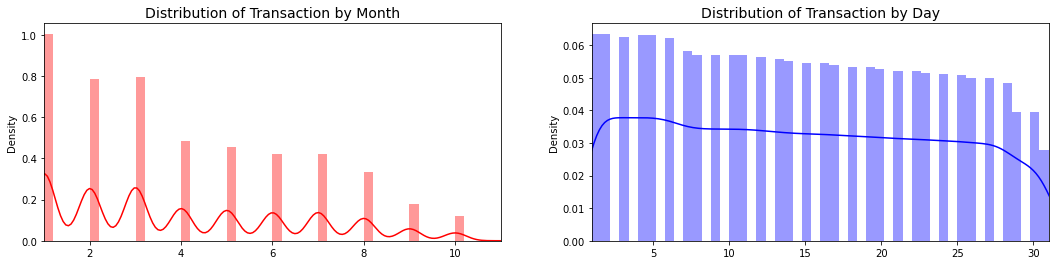

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['month'].values, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction by Month', fontsize=14)
ax[0].set_xlim([min(df['month'].values), max(df['month'].values)])

sns.distplot(df['day'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction by Day', fontsize=14)
ax[1].set_xlim([min(df['day'].values), max(df['day'].values)])


plt.show()

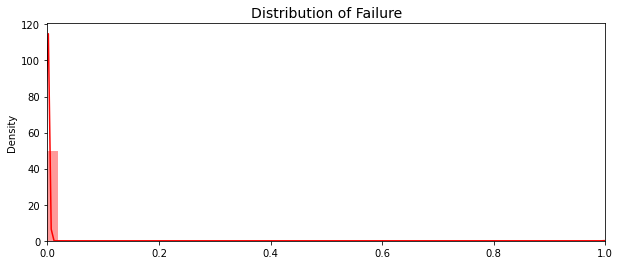

In [26]:
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(df['failure'].values, ax=ax, color='r')
ax.set_title('Distribution of Failure', fontsize=14)
ax.set_xlim([min(df['failure'].values), max(df['failure'].values)])
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute9  124494 non-null  int64 
 10  month       124494 non-null  int64 
 11  day         124494 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 11.4+ MB


In [11]:
df["device"]=[i[:4] for i in df.device.values]

In [12]:
df

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
0,S1F0,0,215630672,56,0,52,6,407438,0,7,1,1
1,S1F0,0,61370680,0,3,0,6,403174,0,0,1,1
2,S1F0,0,173295968,0,0,0,12,237394,0,0,1,1
3,S1F0,0,79694024,0,0,0,6,410186,0,0,1,1
4,S1F0,0,135970480,0,0,0,15,313173,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,Z1F0,0,18310224,0,0,0,10,353705,8,0,11,2
124490,Z1F0,0,172556680,96,107,4,11,332792,0,13,11,2
124491,Z1F0,0,19029120,4832,0,0,11,350410,0,0,11,2
124492,Z1F0,0,226953408,0,0,0,12,358980,0,0,11,2


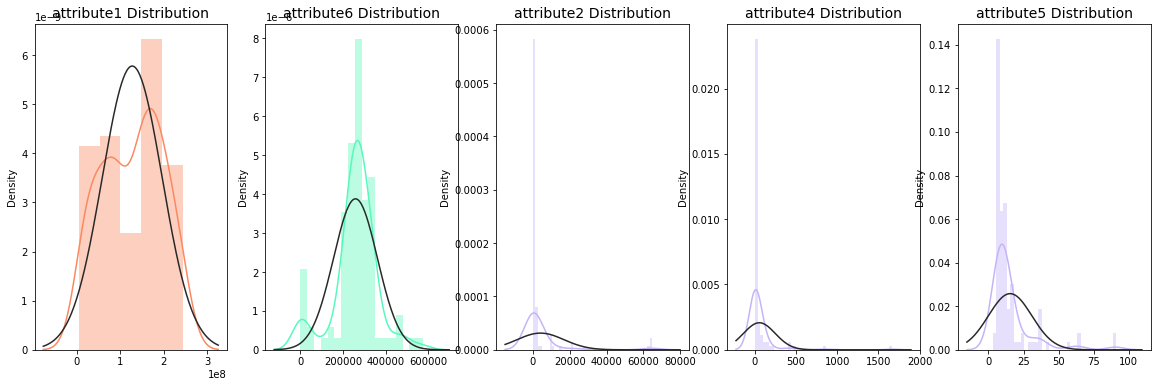

In [30]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 6))

attribute_1 = df['attribute1'].loc[df['failure'] == 1].values
sns.distplot(attribute_1,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('attribute1 Distribution', fontsize=14)

attribute_6 = df['attribute6'].loc[df['failure'] == 1].values
sns.distplot(attribute_6,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('attribute6 Distribution', fontsize=14)


attribute_2 = df['attribute2'].loc[df['failure'] == 1].values
sns.distplot(attribute_2,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('attribute2 Distribution', fontsize=14)

attribute_4 = df['attribute4'].loc[df['failure'] == 1].values
sns.distplot(attribute_4,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('attribute4 Distribution', fontsize=14)

attribute_5 = df['attribute5'].loc[df['failure'] == 1].values
sns.distplot(attribute_5,ax=ax5, fit=norm, color='#C5B3F9')
ax5.set_title('attribute5 Distribution', fontsize=14)

plt.show()

In [63]:
X = df.drop('failure', axis=1)
y = df['failure']

In [64]:
X

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
0,S1F0,215630672,56,0,52,6,407438,0,7,1,1
1,S1F0,61370680,0,3,0,6,403174,0,0,1,1
2,S1F0,173295968,0,0,0,12,237394,0,0,1,1
3,S1F0,79694024,0,0,0,6,410186,0,0,1,1
4,S1F0,135970480,0,0,0,15,313173,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
124489,Z1F0,18310224,0,0,0,10,353705,8,0,11,2
124490,Z1F0,172556680,96,107,4,11,332792,0,13,11,2
124491,Z1F0,19029120,4832,0,0,11,350410,0,0,11,2
124492,Z1F0,226953408,0,0,0,12,358980,0,0,11,2


In [65]:
y.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [66]:
X=pd.get_dummies(X,drop_first=True)

In [67]:
X

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day,device_S1F1,device_W1F0,device_W1F1,device_Z1F0,device_Z1F1,device_Z1F2
0,215630672,56,0,52,6,407438,0,7,1,1,0,0,0,0,0,0
1,61370680,0,3,0,6,403174,0,0,1,1,0,0,0,0,0,0
2,173295968,0,0,0,12,237394,0,0,1,1,0,0,0,0,0,0
3,79694024,0,0,0,6,410186,0,0,1,1,0,0,0,0,0,0
4,135970480,0,0,0,15,313173,0,3,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,18310224,0,0,0,10,353705,8,0,11,2,0,0,0,1,0,0
124490,172556680,96,107,4,11,332792,0,13,11,2,0,0,0,1,0,0
124491,19029120,4832,0,0,11,350410,0,0,11,2,0,0,0,1,0,0
124492,226953408,0,0,0,12,358980,0,0,11,2,0,0,0,1,0,0


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
y_train.value_counts()

0    99507
1       88
Name: failure, dtype: int64

In [70]:
from imblearn.under_sampling import RandomUnderSampler #from imblearn.over_sampling import RandomOverSampler

In [71]:
rus=RandomUnderSampler(random_state=42) #ros = RandomOverSampler() Çok veriyle uğraşmamak için rus kullandım.
X_rus,y_rus=rus.fit_sample(X_train,y_train)

In [72]:
y_train.value_counts()

0    99507
1       88
Name: failure, dtype: int64

In [73]:
y_rus.value_counts()

1    88
0    88
Name: failure, dtype: int64

In [74]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [121]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier")
rf=RandomForestClassifier()
model1=rf.fit(X_train,y_train)
predict1=model1.predict(X_test)

model2=rf.fit(X_rus,y_rus)
predict2=model2.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,predict1))
print("Precision Score:",precision_score(y_test,predict1))
print("Recall Score:",recall_score(y_test,predict1))
print("f1 Score:",f1_score(y_test,predict1))
print("----------------------------------------------------------")
print("Accuracy Score:",accuracy_score(y_test,predict2))
print("Precision Score:",precision_score(y_test,predict2))
print("Recall Score:",recall_score(y_test,predict2))
print("f1 Score:",f1_score(y_test,predict2))

#Train verilerindeki yüzdeyüze yakın doğruluk oranı yanıltıyor. Gerçek başarı oranı için-> rus veya ros metodu

Random Forest Classifier
Accuracy Score: 0.9992770794007791
Precision Score: 0.0
Recall Score: 0.0
f1 Score: 0.0
----------------------------------------------------------
Accuracy Score: 0.867544881320535
Precision Score: 0.003932244404113733
Recall Score: 0.7222222222222222
f1 Score: 0.007821901323706377


In [44]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [45]:
def classification_(x,y):
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        rus=RandomUnderSampler(random_state=42)
        
        x_rus,y_rus=rus.fit_sample(x_train,y_train)
        
        predict=i.fit(x_rus,y_rus).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

In [46]:
classification_(X,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Gaussian,0.990803,0.018265,0.222222,0.033755
LogisticRegr,0.900197,0.004419,0.611111,0.008775
Bernoulli,0.894454,0.004932,0.722222,0.009797
GradientBoosting,0.858830,0.003972,0.777778,0.007903
RandomForest,0.845817,0.003379,0.722222,0.006727
AdaBoost,0.798908,0.002791,0.777778,0.005561
DecisionTree,0.776417,0.002510,0.777778,0.005004
SVC,0.630788,0.000544,0.277778,0.001087
Multinominal,0.551508,0.000806,0.500000,0.001609
KNeigbors,0.469256,0.000832,0.611111,0.001662


In [114]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dropout(0.50),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='softmax'),])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_rus,y_rus, batch_size=128, epochs=40, verbose=1, validation_data=(X_test,y_test))

Epoch 1/40
2/2 [==============================] - 1s 818ms/step - loss: 7677966.6667 - accuracy: 0.0909 - val_loss: 10982942.0000 - val_accuracy: 7.2292e-04
Epoch 2/40
2/2 [==============================] - 1s 748ms/step - loss: 4824062.0000 - accuracy: 0.5000 - val_loss: 247.2498 - val_accuracy: 0.9985
Epoch 3/40
2/2 [==============================] - 1s 717ms/step - loss: 1377610.5417 - accuracy: 0.4860 - val_loss: 1523.9822 - val_accuracy: 0.9993
Epoch 4/40
2/2 [==============================] - 1s 770ms/step - loss: 1374230.5000 - accuracy: 0.4744 - val_loss: 1718938.5000 - val_accuracy: 7.2292e-04
Epoch 5/40
2/2 [==============================] - 1s 717ms/step - loss: 1085267.5833 - accuracy: 0.5040 - val_loss: 120.4671 - val_accuracy: 0.9988
Epoch 6/40
2/2 [==============================] - 1s 724ms/step - loss: 636378.4583 - accuracy: 0.4361 - val_loss: 944.9921 - val_accuracy: 0.9993
Epoch 7/40
2/2 [==============================] - 1s 701ms/step - loss: 681152.5833 - accuracy:

In [117]:
_, accuracy=model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

779/779 [==============================] - 1s 2ms/step - loss: 21.5389 - accuracy: 0.9973
Accuracy: 99.73


In [75]:
X.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute9', 'month', 'day', 'device_S1F1',
       'device_W1F0', 'device_W1F1', 'device_Z1F0', 'device_Z1F1',
       'device_Z1F2'],
      dtype='object')

In [26]:
len(X.columns)

16

In [27]:
n_inputs=16

In [28]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
3113/3113 [==============================] - 2s 446us/step - loss: 9197.3033
Epoch 2/10
3113/3113 [==============================] - 1s 429us/step - loss: 11770.6348
Epoch 3/10
3113/3113 [==============================] - 1s 404us/step - loss: 10816.5442
Epoch 4/10
3113/3113 [==============================] - 1s 417us/step - loss: 11328.8939
Epoch 5/10
3113/3113 [==============================] - 1s 436us/step - loss: 8730.6481
Epoch 6/10
3113/3113 [==============================] - 1s 429us/step - loss: 11096.7874
Epoch 7/10
3113/3113 [==============================] - 1s 421us/step - loss: 8447.4076
Epoch 8/10
3113/3113 [==============================] - 1s 420us/step - loss: 9090.9647
Epoch 9/10
3113/3113 [==============================] - 1s 428us/step - loss: 8505.1253
Epoch 10/10
3113/3113 [==============================] - 1s 414us/step - loss: 9049.2232


In [30]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

0.5


In [119]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_rus,y_rus,epochs=10)

Epoch 1/10
6/6 [==============================] - 0s 0s/step - loss: 9879124.5714
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 5292503.0714
Epoch 3/10
6/6 [==============================] - 0s 0s/step - loss: 2217132.8214
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 748207.2701
Epoch 5/10
6/6 [==============================] - 0s 0s/step - loss: 1398017.9464
Epoch 6/10
6/6 [==============================] - 0s 0s/step - loss: 491151.4955
Epoch 7/10
6/6 [==============================] - 0s 0s/step - loss: 718554.7232
Epoch 8/10
6/6 [==============================] - 0s 0s/step - loss: 236928.1553
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 302450.9844
Epoch 10/10
6/6 [==============================] - 0s 0s/step - loss: 217049.0714


In [120]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

0.5003416261404284


### Weighted Neural Network With Keras

In [105]:
weights_assigned={0:1,1:600}

In [109]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
3113/3113 [==============================] - 2s 501us/step - loss: 24750239.7155
Epoch 2/10
3113/3113 [==============================] - 2s 500us/step - loss: 1671660.0637
Epoch 3/10
3113/3113 [==============================] - 2s 488us/step - loss: 1822697.3721
Epoch 4/10
3113/3113 [==============================] - 1s 466us/step - loss: 1564064.4711
Epoch 5/10
3113/3113 [==============================] - 1s 473us/step - loss: 1781789.8636
Epoch 6/10
3113/3113 [==============================] - 1s 456us/step - loss: 1742262.4057
Epoch 7/10
3113/3113 [==============================] - 1s 466us/step - loss: 1480889.5476
Epoch 8/10
3113/3113 [==============================] - 1s 463us/step - loss: 1605789.5043
Epoch 9/10
3113/3113 [==============================] - 1s 466us/step - loss: 1860947.4962
Epoch 10/10
3113/3113 [==============================] - 1s 472us/step - loss: 1364720.3428


In [110]:
y_pred=model.predict(X_test)

In [111]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.515574132872473